# **TUBIN Infrared Image Classifier Training**

if you want to access and use the classifier only go directly to [TUBIN Image Classifier](##tubin-infrared-image-classifier) and start with a pretrained model.

In [1]:
%matplotlib widget
from TUBIN_IR_processing import TUBINImageProcessor, UNetTrainer, IRImageClassifier

Set path of the preprocessed TUBIN IR images and label maps

In [2]:
data_path ='/Users/lukas/Dokumente/Uni/SSI/CNN_data/cloudfirewater/high_res/'
img_data = TUBINImageProcessor(data_path)

Shape of image array: (38, 512, 640, 1)
Shape of square image array: (456, 256, 256, 1)


Visual check random imported data sample 

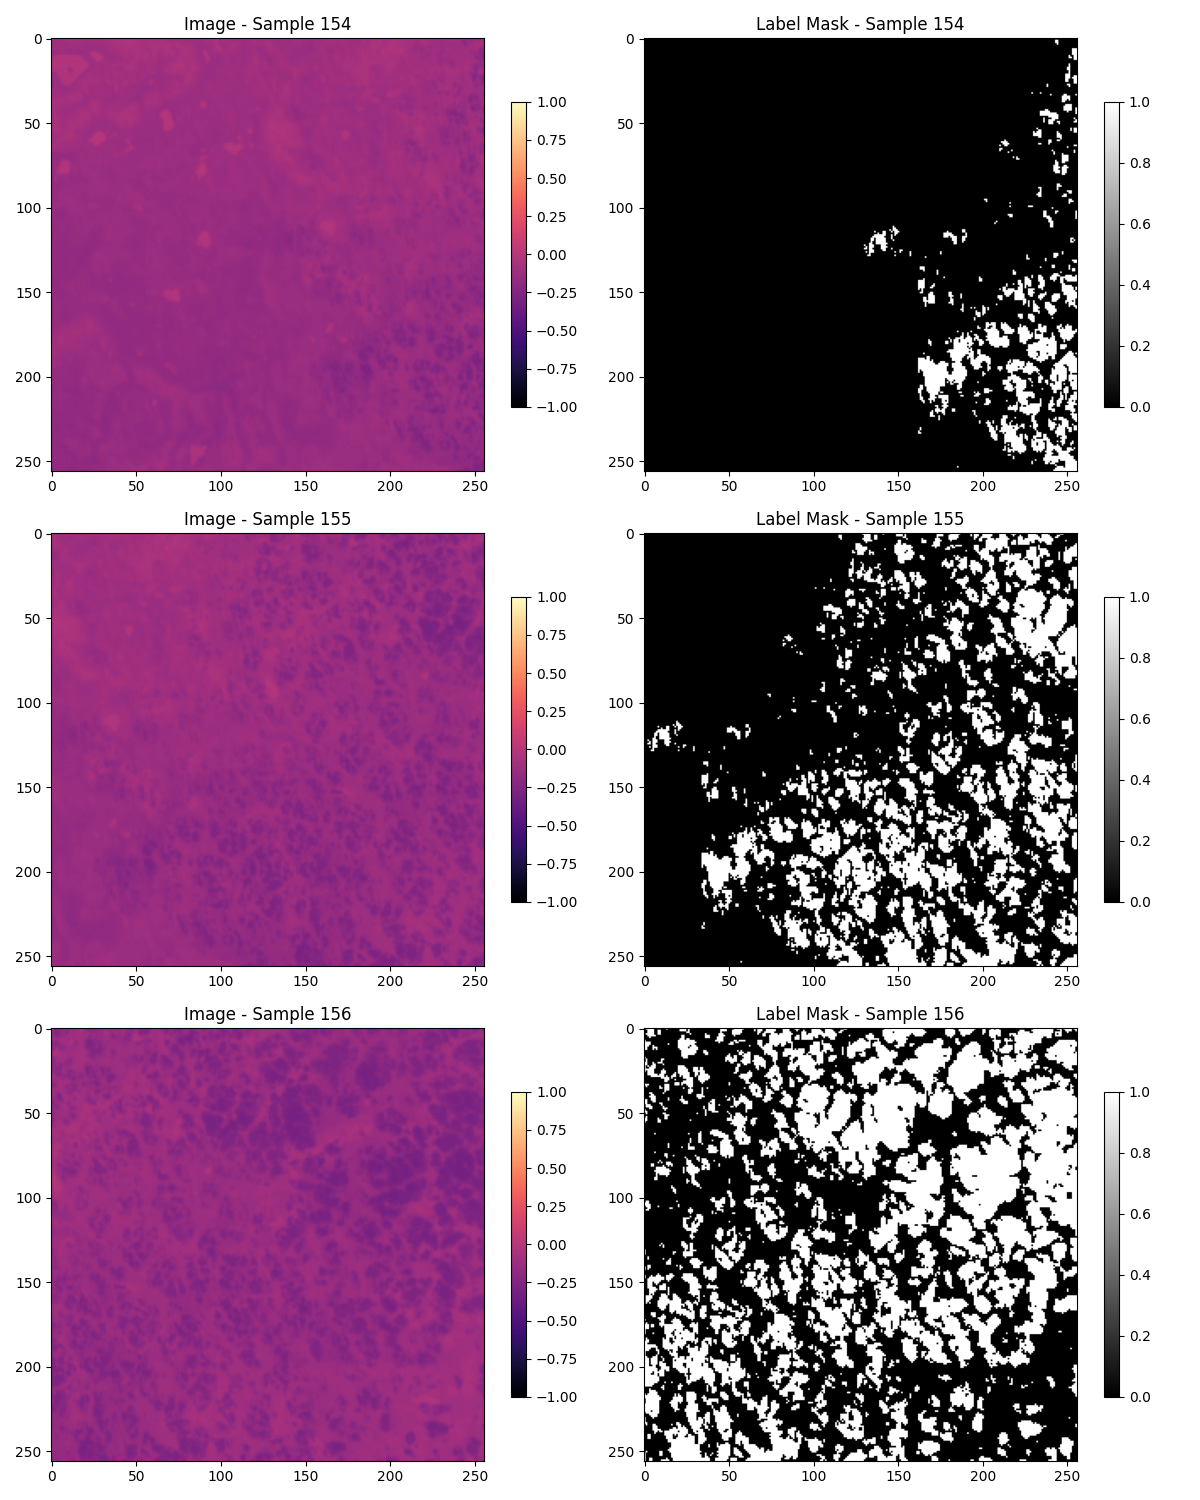

In [3]:
img_data.plot_samples(num_samples=3)

Initianlize a predefined skipping unet model

In [4]:
input_shape = img_data.image_train.shape[1:]
unet_manager = UNetTrainer(input_shape)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         160       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 16)         64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['batch_normalization[0][0

In [11]:
img_data.class_weights

{0: 1, 1: 2, 2: 2, 3: 15}

Initial model training

In [6]:
# Initial training
history = unet_manager.fit_model(img_data.image_train, 
                                 img_data.mask_train, 
                                 img_data.image_test, 
                                 img_data.mask_test, 
                                 class_weights=img_data.class_weights, 
                                 epochs=200)

Epoch 1/200
45/45 [==============================] - 38s 825ms/step - loss: 1.3319 - accuracy: 0.5498 - val_loss: 1.1633 - val_accuracy: 0.5774 - lr: 0.0050
Epoch 2/200
45/45 [==============================] - 37s 829ms/step - loss: 0.8907 - accuracy: 0.7449 - val_loss: 0.8637 - val_accuracy: 0.7300 - lr: 0.0050
Epoch 3/200
45/45 [==============================] - 36s 810ms/step - loss: 0.7917 - accuracy: 0.7894 - val_loss: 0.7764 - val_accuracy: 0.7932 - lr: 0.0050
Epoch 4/200
45/45 [==============================] - 36s 795ms/step - loss: 0.7199 - accuracy: 0.8066 - val_loss: 0.7836 - val_accuracy: 0.7031 - lr: 0.0050
Epoch 5/200
45/45 [==============================] - 36s 793ms/step - loss: 0.7160 - accuracy: 0.8081 - val_loss: 0.6284 - val_accuracy: 0.7748 - lr: 0.0050
Epoch 6/200
45/45 [==============================] - 36s 794ms/step - loss: 0.6115 - accuracy: 0.8378 - val_loss: 0.6680 - val_accuracy: 0.6927 - lr: 0.0050
Epoch 7/200
45/45 [==============================] - 36s 7

further model training after model evaluation

In [53]:
img_data.class_weights = {
        0: 1,  # no_cloud
        1: 1,  # cloud
        2: 1,  # water
        3: 15  # fire
    }

In [60]:
unet_manager.continue_training(img_data.image_train, 
                               img_data.mask_train, 
                               img_data.image_test, 
                               img_data.mask_test, 
                               class_weights=img_data.class_weights, 
                               additional_epochs=25)

Epoch 1/25
45/45 [==============================] - 38s 834ms/step - loss: 0.1519 - accuracy: 0.9458 - val_loss: 0.1431 - val_accuracy: 0.9427 - lr: 0.0012
Epoch 2/25
45/45 [==============================] - 36s 811ms/step - loss: 0.1449 - accuracy: 0.9482 - val_loss: 0.1451 - val_accuracy: 0.9423 - lr: 0.0012
Epoch 3/25
45/45 [==============================] - 36s 798ms/step - loss: 0.1453 - accuracy: 0.9484 - val_loss: 0.1431 - val_accuracy: 0.9429 - lr: 0.0012
Epoch 4/25
45/45 [==============================] - 36s 799ms/step - loss: 0.1576 - accuracy: 0.9442 - val_loss: 0.1429 - val_accuracy: 0.9427 - lr: 0.0012
Epoch 5/25
45/45 [==============================] - 36s 801ms/step - loss: 0.1501 - accuracy: 0.9470 - val_loss: 0.1474 - val_accuracy: 0.9409 - lr: 0.0012
Epoch 6/25
45/45 [==============================] - 36s 802ms/step - loss: 0.1659 - accuracy: 0.9419 - val_loss: 0.1443 - val_accuracy: 0.9422 - lr: 0.0012
Epoch 7/25
45/45 [==============================] - 37s 826ms/st

training progress documentation

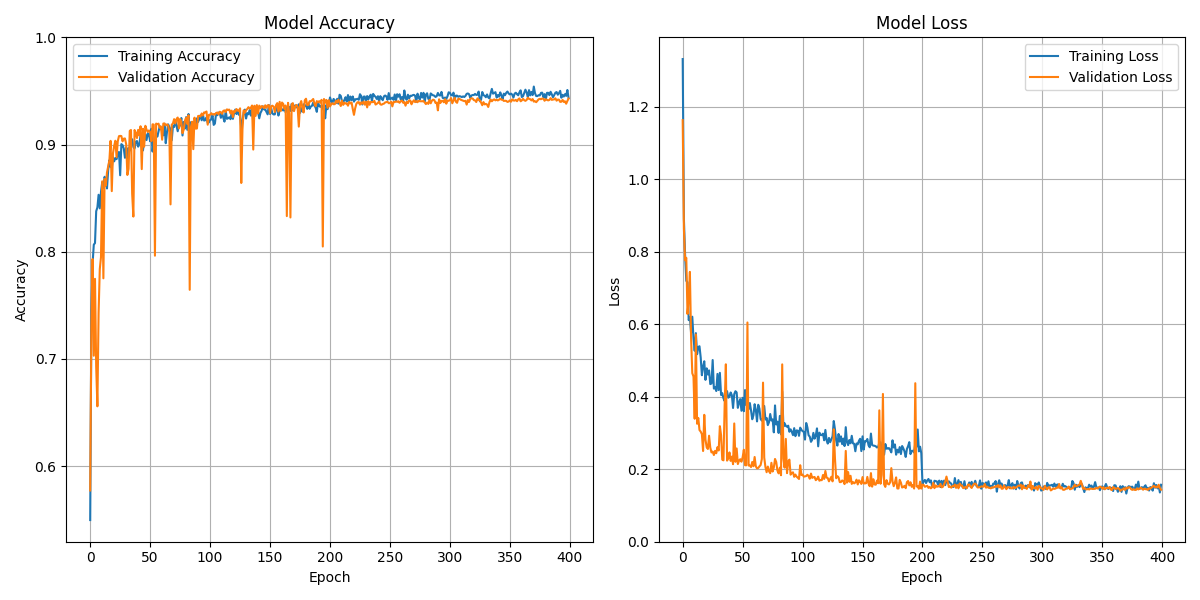

In [61]:
unet_manager.plot_history()

model performance on training data 

In [62]:
predictions, diff = unet_manager.predict_train_data(img_data.image_train, img_data.mask_train)

12/12 [==============================] - 9s 703ms/step


Visualization of the training predictions

Random offset: 16, Total samples: 364


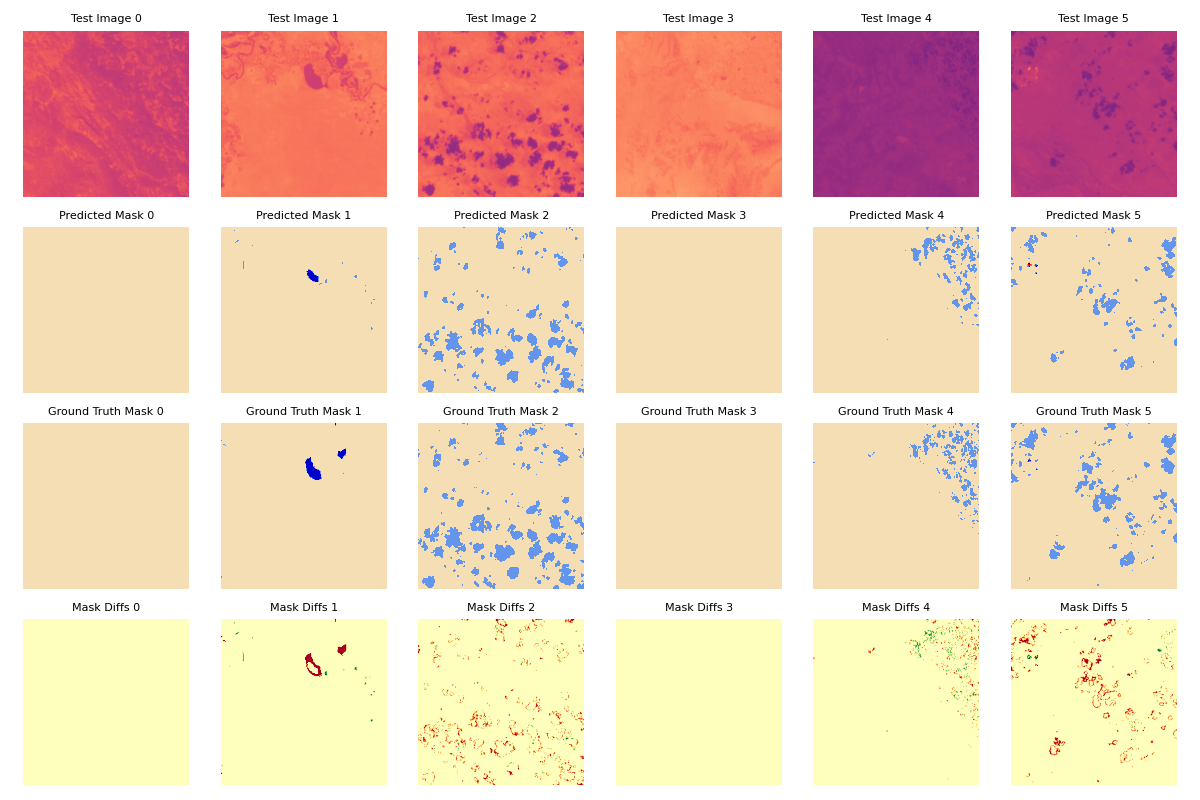

In [66]:
unet_manager.visualize_train_pred(img_data.image_train, predictions, img_data.mask_train, diff)

saving model parameter after training

In [25]:
unet_manager.model.save('models/best_IR_clf_256x16_wc_temp.keras')

## **TUBIN Infrared Image Classifier**

load model from model folder and initialize the classifier. the following part of the notebook shows the example use of the prediction algorithm on TUBIN images.

In [67]:
model_path = 'models/best_IR_clf_256x16_wc_2.keras'
image_pred = IRImageClassifier(model_path)

In [68]:
# set initial index
idx = None

make a prediction on a complete TUBIN image

In [71]:
idx = 0 if idx is None else idx + 1
idx %= img_data.image_data.shape[0]

print(f'Image ID: {idx}')

class_map, prob_map, hotspots = image_pred.predict_classmap(img_data.image_data[idx])

Image ID: 1


100%|██████████| 4/4 [00:00<00:00,  6.58it/s]


prediction evaluation and highlighting fire hotspots

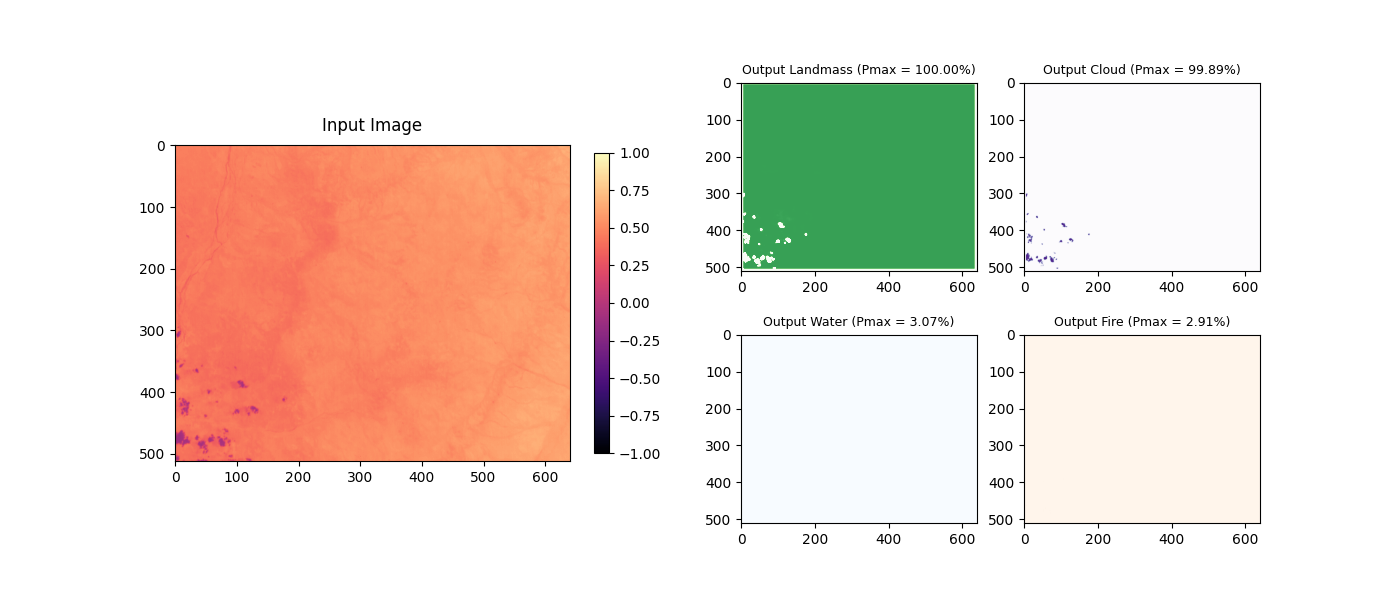

In [72]:
image_pred.plot_predictions()

creating a composite output map with individual probability thresholds for each class

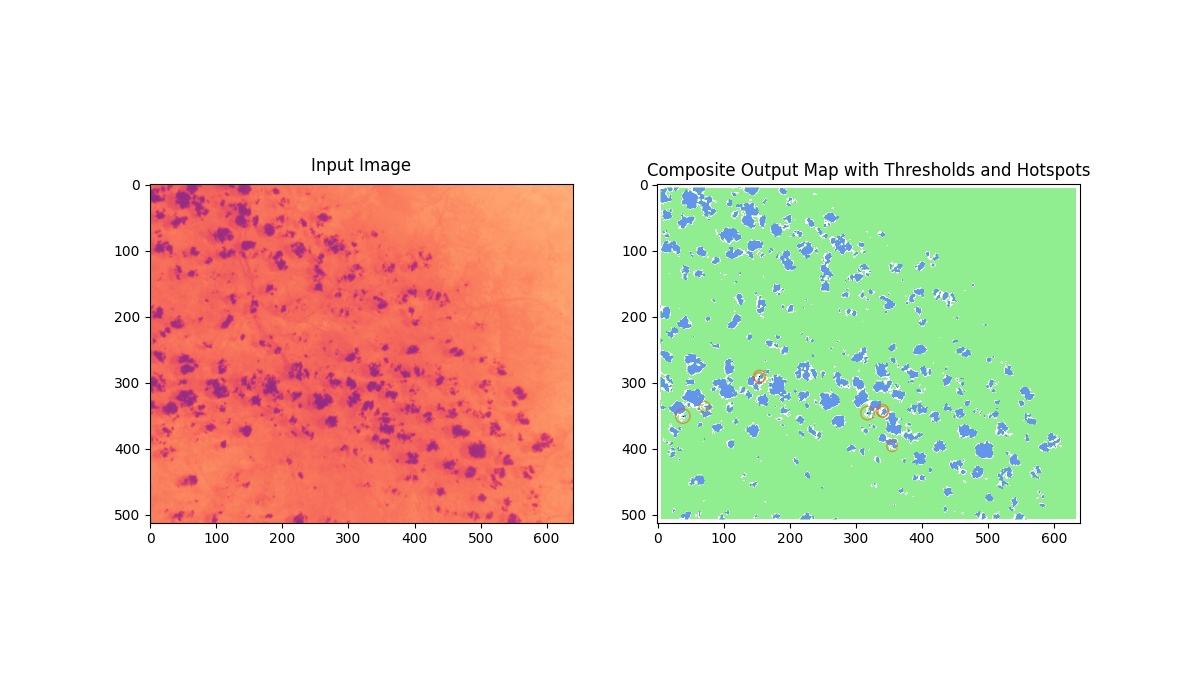

In [87]:
image_pred.create_thresholded_composite_map()